In [1]:
library(Quandl)

Loading required package: xts
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



In [2]:
Quandl("ODA/PBANSOP_USD", api_key="2Tn6xx-X8y8ywzbtYPWZ")
x=Quandl("ODA/PBANSOP_USD", api_key="2Tn6xx-X8y8ywzbtYPWZ")

Date,Value
2017-06-30,1098.07
2017-05-31,1083.05
2017-04-30,1063.54
2017-03-31,1075.25
2017-02-28,1040.10
2017-01-31,974.03
2016-12-31,959.94
2016-11-30,959.94
2016-10-31,976.39
2016-09-30,1013.31


In [3]:
x=Quandl("ODA/PBANSOP_USD", type="ts")

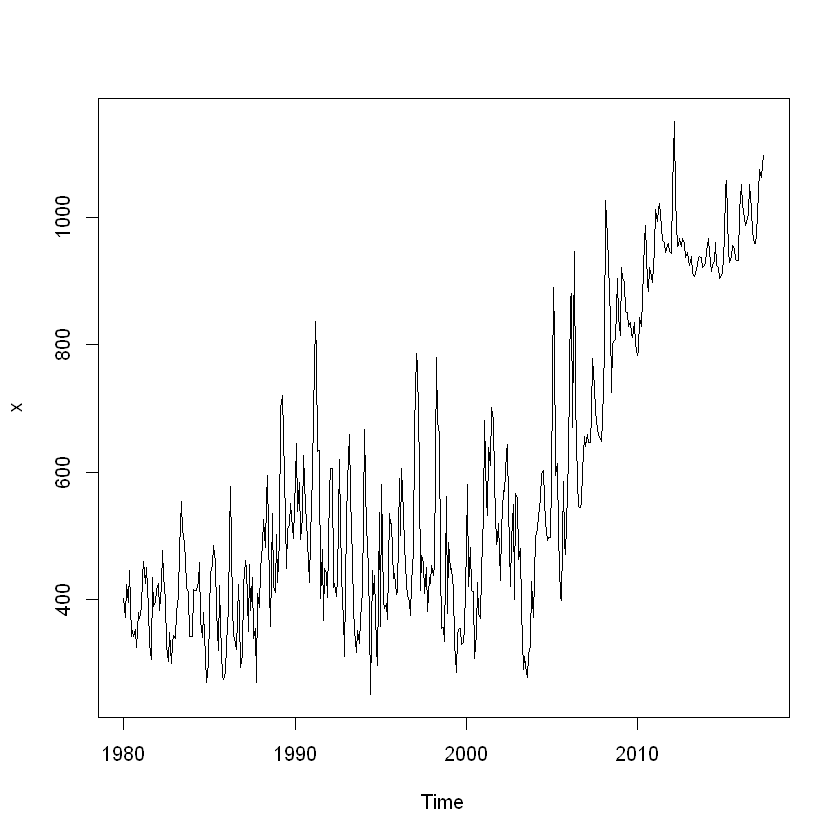

In [4]:
plot(x)

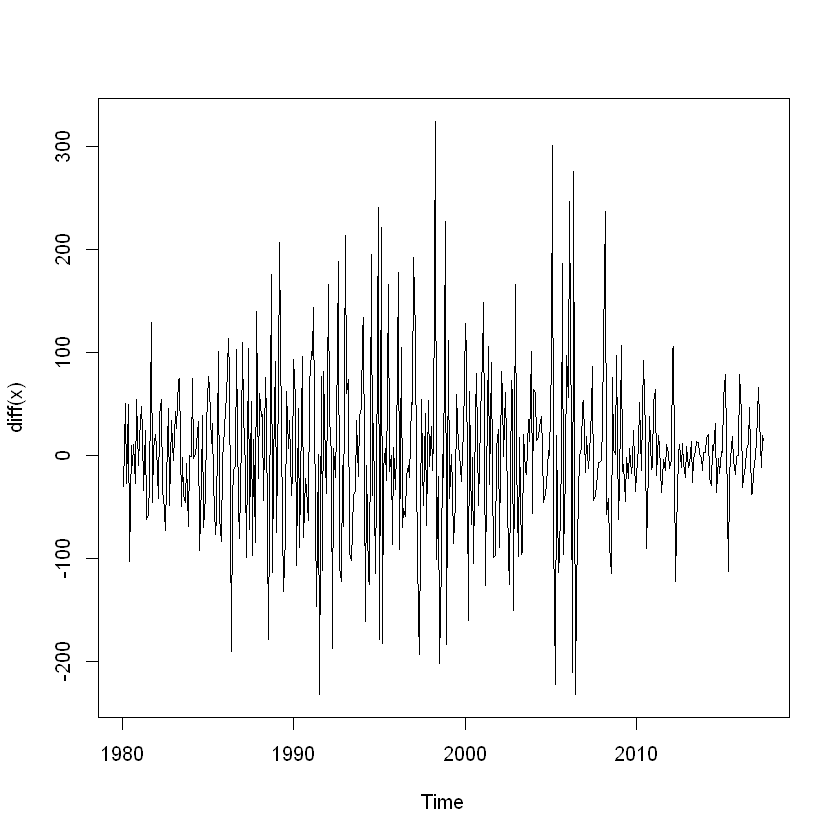

In [5]:
plot(diff(x))

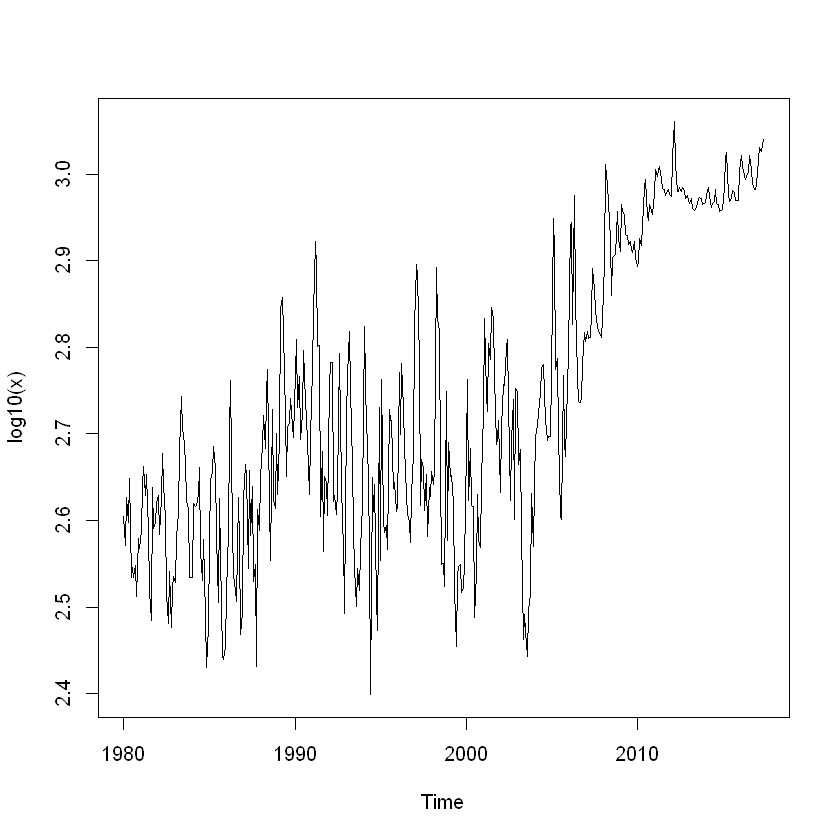

In [6]:
plot(log10(x))

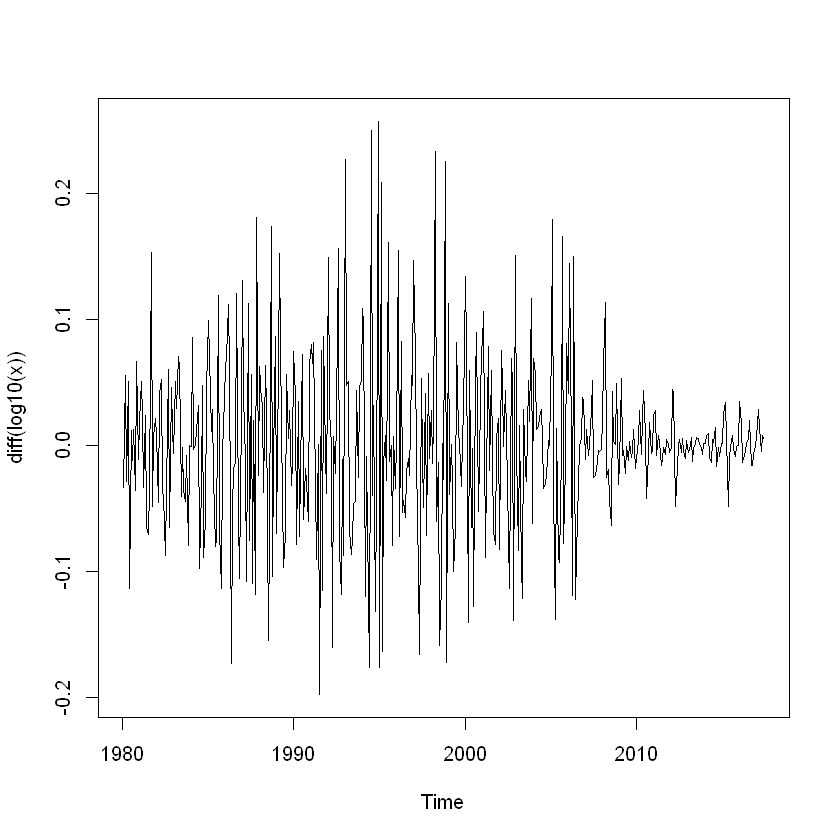

In [7]:
plot(diff(log10(x)))

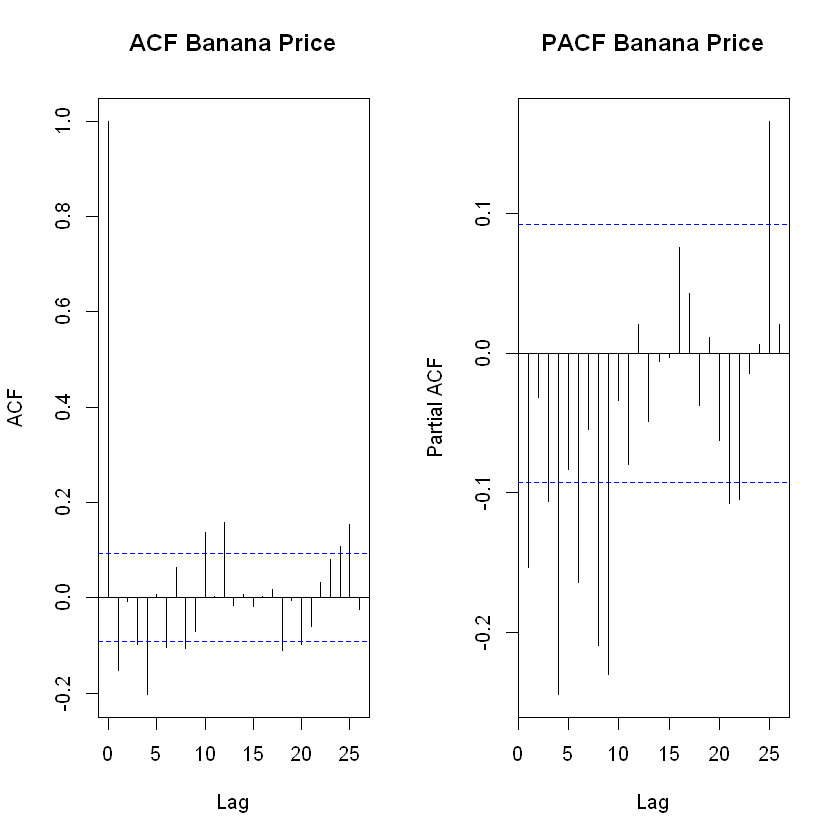

In [8]:
par(mfrow = c(1,2))
acf(ts(diff(log10(x))),main='ACF Banana Price')
pacf(ts(diff(log10(x))),main='PACF Banana Price')

In [9]:
require(forecast)
ARIMAfit = auto.arima(log10(x), approximation=FALSE,trace=FALSE)
summary(ARIMAfit)

Loading required package: forecast


Series: log10(x) 
ARIMA(4,1,2)(2,0,0)[12] 

Coefficients:
          ar1     ar2      ar3      ar4      ma1      ma2    sar1    sar2
      -0.0298  0.4044  -0.0457  -0.1940  -0.2782  -0.5398  0.1341  0.0721
s.e.   0.1751  0.1214   0.0520   0.0518   0.1746   0.1660  0.0481  0.0489

sigma^2 estimated as 0.003935:  log likelihood=609.59
AIC=-1201.18   AICc=-1200.77   BIC=-1164.21

Training set error measures:
                      ME       RMSE        MAE        MPE    MAPE      MASE
Training set 0.003533337 0.06209578 0.04489997 0.07883929 1.67392 0.5903512
                     ACF1
Training set -0.003467513


In [10]:
par(mfrow = c(1,1))
pred = predict(ARIMAfit, n.ahead = 36)
pred
plot(data,type='l',xlim=c(1980,2020))
lines(10^(pred$pred),col='green')
lines(10^(pred$pred+2*pred$se),col='orange')
lines(10^(pred$pred-2*pred$se),col='orange')

$pred
          Jan      Feb      Mar      Apr      May      Jun      Jul      Aug
2017                                                       3.028372 3.023808
2018 3.011764 3.017658 3.019269 3.018078 3.018704 3.019562 3.018111 3.018856
2019 3.014858 3.017709 3.018967 3.018462 3.019113 3.019658 3.018578 3.018349
2020 3.016945 3.017752 3.018037 3.017884 3.018016 3.018151                  
          Sep      Oct      Nov      Dec
2017 3.013755 3.007448 3.006318 3.006761
2018 3.016309 3.014305 3.013640 3.013716
2019 3.017282 3.016559 3.016389 3.016431
2020                                    

$se
            Jan        Feb        Mar        Apr        May        Jun
2017                                                                  
2018 0.08946865 0.09006676 0.09079843 0.09169018 0.09271865 0.09371534
2019 0.10426559 0.10527977 0.10630690 0.10734863 0.10839938 0.10943689
2020 0.11892549 0.11998401 0.12104703 0.12211580 0.12318732 0.12424787
            Jul        Aug        Sep       

Warning message in x(x):
"data set 'x' not found"

ERROR: Error in curve(expr = x, from = from, to = to, xlim = xlim, ylab = ylab, : 'expr' did not evaluate to an object of length 'n'


$pred
          Jan      Feb      Mar      Apr      May      Jun      Jul      Aug
2017                                                       3.028372 3.023808
2018 3.011764 3.017658 3.019269 3.018078 3.018704 3.019562 3.018111 3.018856
2019 3.014858 3.017709 3.018967 3.018462 3.019113 3.019658 3.018578 3.018349
2020 3.016945 3.017752 3.018037 3.017884 3.018016 3.018151                  
          Sep      Oct      Nov      Dec
2017 3.013755 3.007448 3.006318 3.006761
2018 3.016309 3.014305 3.013640 3.013716
2019 3.017282 3.016559 3.016389 3.016431
2020                                    

$se
            Jan        Feb        Mar        Apr        May        Jun
2017                                                                  
2018 0.08946865 0.09006676 0.09079843 0.09169018 0.09271865 0.09371534
2019 0.10426559 0.10527977 0.10630690 0.10734863 0.10839938 0.10943689
2020 0.11892549 0.11998401 0.12104703 0.12211580 0.12318732 0.12424787
            Jul        Aug        Sep       

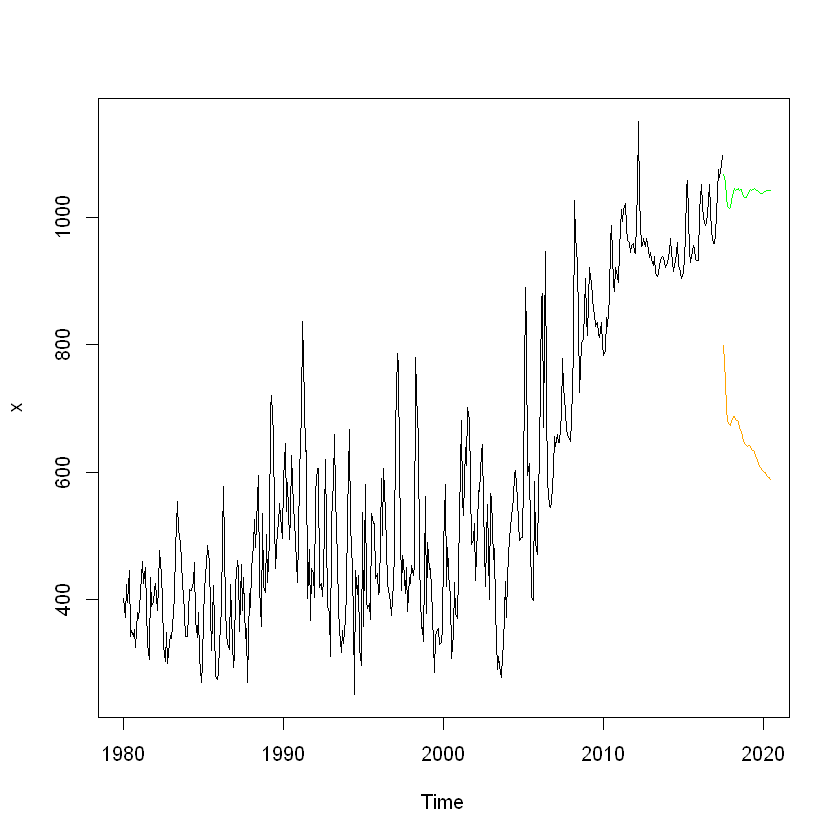

In [11]:
par(mfrow = c(1,1))
pred = predict(ARIMAfit, n.ahead = 36)
pred
plot(x,type='l',xlim=c(1980,2020))
lines(10^(pred$pred),col='green')
lines(10^(pred$pred+2*pred$se),col='orange')
lines(10^(pred$pred-2*pred$se),col='orange')

$pred
          Jan      Feb      Mar      Apr      May      Jun      Jul      Aug
2017                                                       3.028372 3.023808
2018 3.011764 3.017658 3.019269 3.018078 3.018704 3.019562 3.018111 3.018856
2019 3.014858 3.017709 3.018967 3.018462 3.019113 3.019658 3.018578 3.018349
2020 3.016945 3.017752 3.018037 3.017884 3.018016 3.018151                  
          Sep      Oct      Nov      Dec
2017 3.013755 3.007448 3.006318 3.006761
2018 3.016309 3.014305 3.013640 3.013716
2019 3.017282 3.016559 3.016389 3.016431
2020                                    

$se
            Jan        Feb        Mar        Apr        May        Jun
2017                                                                  
2018 0.08946865 0.09006676 0.09079843 0.09169018 0.09271865 0.09371534
2019 0.10426559 0.10527977 0.10630690 0.10734863 0.10839938 0.10943689
2020 0.11892549 0.11998401 0.12104703 0.12211580 0.12318732 0.12424787
            Jul        Aug        Sep       

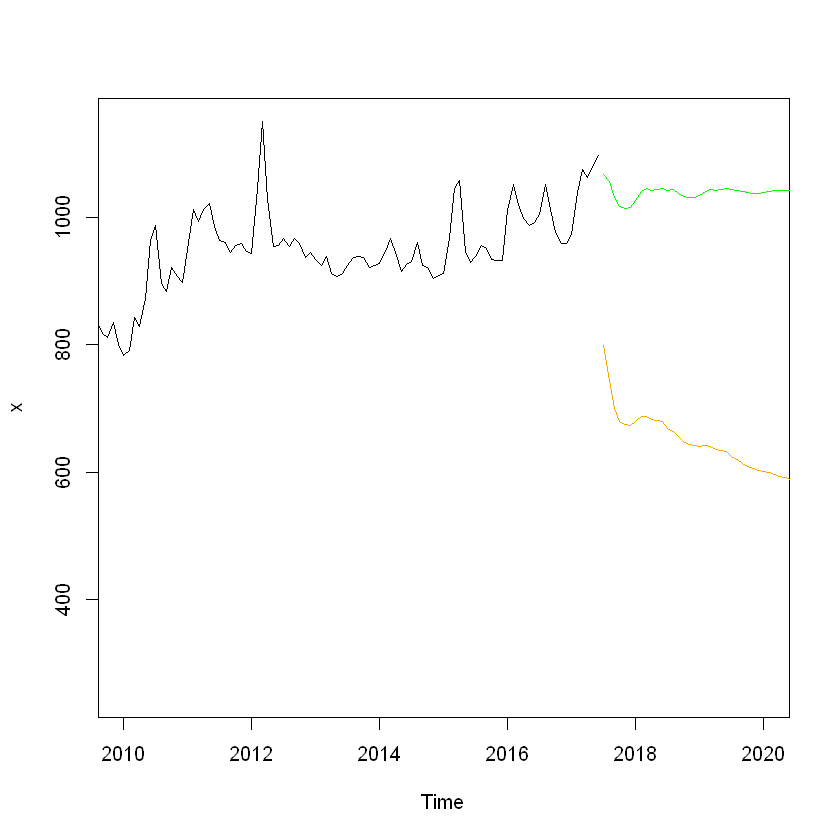

In [12]:
par(mfrow = c(1,1))
pred = predict(ARIMAfit, n.ahead = 36)
pred
plot(x,type='l',xlim=c(2010,2020))
lines(10^(pred$pred),col='green')
lines(10^(pred$pred+2*pred$se),col='orange')
lines(10^(pred$pred-2*pred$se),col='orange')

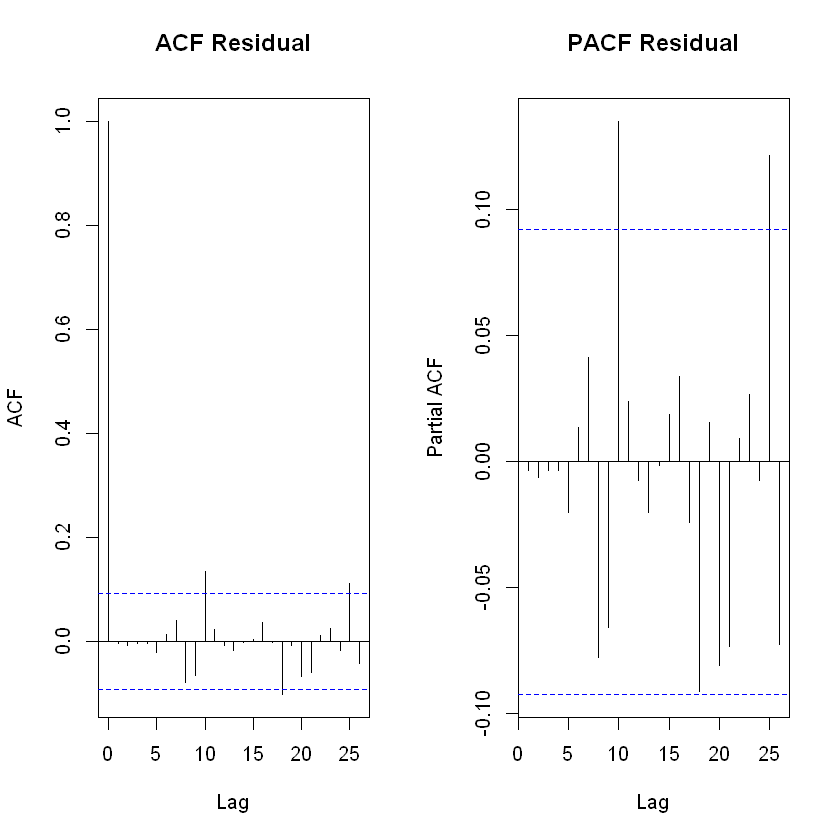

In [13]:
par(mfrow=c(1,2))
acf(ts(ARIMAfit$residuals),main='ACF Residual')
pacf(ts(ARIMAfit$residuals),main='PACF Residual')